R² Score: 0.95
🌾 Optimal fertilizer: 51.7 kg → 3.86 tons/acre


Enter fertilizer amount (kg):  78


Predicted crop yield: 3.01 tons/acre 🌾
⚠️  Too much fertilizer! Reduce to 52kg for best results!


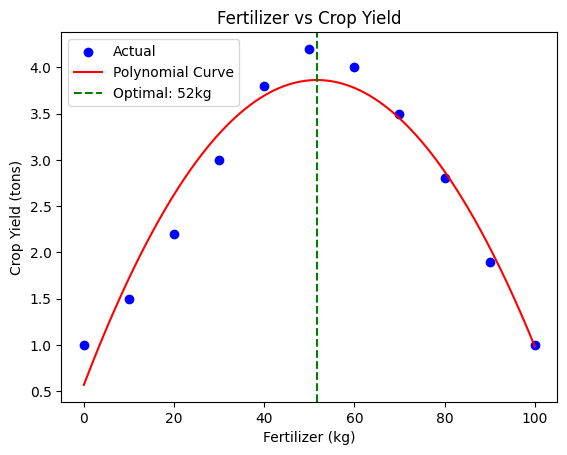

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Fertilizer (kg) vs Crop yield (tons)
fertilizer = [[0],[10],[20],[30],[40],[50],[60],[70],[80],[90],[100]]
yield_tons = [1.0, 1.5, 2.2, 3.0, 3.8, 4.2, 4.0, 3.5, 2.8, 1.9, 1.0]

poly   = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(fertilizer)

model  = LinearRegression()
model.fit(X_poly, yield_tons)

predictions = model.predict(X_poly)
print("R² Score:", round(r2_score(yield_tons, predictions), 3))

# Find optimal fertilizer amount
fert_range = np.linspace(0, 100, 1000).reshape(-1, 1)
fert_poly  = poly.transform(fert_range)
all_preds  = model.predict(fert_poly)
best_fert  = fert_range[np.argmax(all_preds)][0]
best_yield = all_preds.max()
print(f"🌾 Optimal fertilizer: {best_fert:.1f} kg → {best_yield:.2f} tons/acre")

# Safe range
min_fert, max_fert = 0, 100

fert_input = float(input("Enter fertilizer amount (kg): "))

if fert_input < min_fert or fert_input > max_fert:
    print(f"⚠️  Enter between {min_fert} and {max_fert} kg only!")
else:
    fert_poly_input = poly.transform([[fert_input]])
    predicted       = model.predict(fert_poly_input)[0]
    predicted       = max(0, predicted)

    print(f"Predicted crop yield: {predicted:.2f} tons/acre 🌾")

    if fert_input < best_fert:
        print(f"💡 Tip: Increase fertilizer to {best_fert:.0f}kg for max yield!")
    elif fert_input > best_fert:
        print(f"⚠️  Too much fertilizer! Reduce to {best_fert:.0f}kg for best results!")
    else:
        print("✅ Perfect amount!")

# Plot
plt.scatter(fertilizer, yield_tons, color='blue', label='Actual')
plt.plot(fert_range, all_preds, color='red', label='Polynomial Curve')
plt.axvline(best_fert, color='green', linestyle='--', label=f'Optimal: {best_fert:.0f}kg')
plt.xlabel('Fertilizer (kg)')
plt.ylabel('Crop Yield (tons)')
plt.title('Fertilizer vs Crop Yield')
plt.legend()
plt.show()